In [2]:
#Import Preprocessing Libraries  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# import Sickit-learn 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# Models from sklearn 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# 1) Data Preprocessing & EDA 

# > Initial data preparation

## 1.1) Data Loading

In [3]:
loan = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')

In [4]:
loans = loan.copy()
loans.head().T

,0,1,2,3,4
Loan_ID,LP001002,LP001003,LP001005,LP001006,LP001008
Gender,Male,Male,Male,Male,Male
Married,No,Yes,Yes,Yes,No
Dependents,0,1,0,0,0
Education,Graduate,Graduate,Graduate,Not Graduate,Graduate
Self_Employed,No,No,Yes,No,No
ApplicantIncome,5849,4583,3000,2583,6000
CoapplicantIncome,0.0,1508.0,0.0,2358.0,0.0
LoanAmount,NaN,128.0,66.0,120.0,141.0
Loan_Amount_Term,360.0,360.0,360.0,360.0,360.0


In [5]:
# shape of data
loans.shape

(614, 13)

In [6]:
# columns type of Dataset
loans.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# 1.2)  Data Cleansing 

- ### Uniform columns name and  values 

In [7]:
# Uniform name of columns 
loans.columns = loans.columns.str.lower().str.replace(" ","_")
loans.columns

Index(['loan_id', 'gender', 'married', 'dependents', 'education',
       'self_employed', 'applicantincome', 'coapplicantincome', 'loanamount',
       'loan_amount_term', 'credit_history', 'property_area', 'loan_status'],
      dtype='object')

In [8]:
# String Columns  
string_columns = list(loans.dtypes[loans.dtypes == 'object'].index)

# drop Loan_ID from String columns
string_columns = [
 'gender',
 'married',
 'dependents',
 'education',
 'self_employed',
 'property_area',
 'loan_status']

In [9]:
# Uniform Values of Dataset 
for col in string_columns:
    loans[col] = loans[col].str.lower().str.replace(" ","_")
display(loans.head())

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,LP001002,male,no,0,graduate,no,5849,0.0,NaN,360.0,1.0,urban,y
1,LP001003,male,yes,1,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,LP001005,male,yes,0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,LP001006,male,yes,0,not_graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,LP001008,male,no,0,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y


In [10]:
# check unique values to spot abnormal values

for i in string_columns:
    print(f'Name of column: {i}')
    print(f'unique values : {loans[i].nunique()}')
    print(f'{loans[i].unique()}\n')

Name of column: gender
unique values : 2
['male' 'female' nan]

Name of column: married
unique values : 2
['no' 'yes' nan]

Name of column: dependents
unique values : 4
['0' '1' '2' '3+' nan]

Name of column: education
unique values : 2
['graduate' 'not_graduate']

Name of column: self_employed
unique values : 2
['no' 'yes' nan]

Name of column: property_area
unique values : 3
['urban' 'rural' 'semiurban']

Name of column: loan_status
unique values : 2
['y' 'n']



# 1.2.2) Dealing with outliers

In [11]:
# Replacing abnormal value of dependents column
loans.dependents = loans.dependents.replace('3+',4)

# 1.2.3) Data Casting 

In [12]:
# columns casting from object to numeric  
loans.dependents = pd.to_numeric(loans.dependents)
loans.loan_status = ((loans.loan_status == 'y').astype(int))


In [13]:
loans.loan_status.value_counts()

loan_status
1    422
0    192
Name: count, dtype: int64

In [14]:
# data types
loans.dtypes

loan_id               object
gender                object
married               object
dependents           float64
education             object
self_employed         object
applicantincome        int64
coapplicantincome    float64
loanamount           float64
loan_amount_term     float64
credit_history       float64
property_area         object
loan_status            int32
dtype: object

# 1.2.4) Dealing with missing values

In [15]:
# check the missing values per each columns 
print(loans.isnull().sum())


loan_id               0
gender               13
married               3
dependents           15
education             0
self_employed        32
applicantincome       0
coapplicantincome     0
loanamount           22
loan_amount_term     14
credit_history       50
property_area         0
loan_status           0
dtype: int64


In [16]:
# Define Categorical and numerical columns that contains missing values
categorical = ['gender', 'married','dependents','education',
       'self_employed','credit_history', 'property_area','loan_status']

numerical = ['applicantincome', 'coapplicantincome', 'loanamount','loan_amount_term']

# Filing missing values for categorical data
for col in categorical:
    loans[col].fillna(loans[col].mode().iloc[0], inplace =True)
    
# Filing missing values for numerical data
for col in numerical:
    loans[col].fillna(loans[col].mean(), inplace=True)

In [17]:
# No missing values now 
loans.isnull().sum()

loan_id              0
gender               0
married              0
dependents           0
education            0
self_employed        0
applicantincome      0
coapplicantincome    0
loanamount           0
loan_amount_term     0
credit_history       0
property_area        0
loan_status          0
dtype: int64

# Explotary Data Analysis

In [18]:
loans.loan_status.value_counts(normalize=True)

loan_status
1    0.687296
0    0.312704
Name: proportion, dtype: float64

# 2) Feature Importance 

In [19]:
female_yes = loans[loans.gender == 'female'].loan_status.mean()
print('gender == female:', round(female_yes, 3))

male_yes = loans[loans.gender == 'male'].loan_status.mean()
print('gender == female:', round(male_yes, 3))

gender == female: 0.67
gender == female: 0.691


### Risk ratio

In [20]:
global_mean = loans.loan_status.mean()

In [21]:
# preparing categorical and numberical data for analysis
categorical_cols = ['credit_history', 'property_area', 'married', 'education', 'dependents',
       'gender', 'self_employed']
numerical_cols = ['applicantincome', 'coapplicantincome', 'loanamount','loan_amount_term']
# number of unique values per categorical datasset
loans[categorical].nunique()

gender            2
married           2
dependents        4
education         2
self_employed     2
credit_history    2
property_area     3
loan_status       2
dtype: int64

# 2.1) Feature importance: Status rate and risk ratio 

In [22]:
# import IPthon library to display 
from IPython.display import display

In [23]:
# Grouping Categorical Columnns by mean and count per loan status and check the status rate and risk ration for each group.
for col in categorical_cols:
    df_group = loans.groupby(by=col).loan_status.agg(['mean','count'])
    df_group['diff'] = df_group['mean'] - global_mean
    df_group['risk'] = df_group['mean'] / global_mean
    display(df_group)

,mean,count,diff,risk
credit_history,,,,
0.0,0.078652,89,-0.608645,0.114436
1.0,0.790476,525,0.103180,1.150124


,mean,count,diff,risk
property_area,,,,
rural,0.614525,179,-0.072771,0.894120
semiurban,0.768240,233,0.080944,1.117771
urban,0.658416,202,-0.028881,0.957979


,mean,count,diff,risk
married,,,,
no,0.629108,213,-0.058188,0.915337
yes,0.718204,401,0.030908,1.044971


,mean,count,diff,risk
education,,,,
graduate,0.708333,480,0.021037,1.030608
not_graduate,0.611940,134,-0.075356,0.890359


,mean,count,diff,risk
dependents,,,,
0.0,0.686111,360,-0.001185,0.998275
1.0,0.647059,102,-0.040238,0.941455
2.0,0.752475,101,0.065179,1.094834
4.0,0.647059,51,-0.040238,0.941455


,mean,count,diff,risk
gender,,,,
female,0.669643,112,-0.017654,0.974314
male,0.691235,502,0.003939,1.005731


,mean,count,diff,risk
self_employed,,,,
no,0.687970,532,0.000674,1.000980
yes,0.682927,82,-0.004370,0.993642


# -----------------------

In [24]:
loans_analysis =  loans[['gender', 'married', 'dependents', 'education',
       'self_employed', 'applicantincome', 'coapplicantincome', 'loanamount',
       'loan_amount_term', 'credit_history', 'property_area', 'loan_status']]
loans_analysis['total'] =loans_analysis.applicantincome + loans_analysis.coapplicantincome
# loans_analysis['diff'] =loans_analysis.applicantincome - loans_analysis.loanamount
# loans_analysis['total'] =loans_analysis.applicantincome + loans_analysis.coapplicantincome
# loans_analysis['diff_1'] =loans_analysis.total - loans_analysis.loanamount
# loans_analysis['diff'] = loans_analysis['diff'].astype(float)
# loans_analysis['diff_1'] = loans_analysis['diff_1'].astype(float)
# loans_analysis= loans_analysis.drop(columns=['applicantincome','coapplicantincome'])

In [25]:
# loans_analysis[loans_analysis.applicantincome ]

In [26]:
loans.columns

Index(['loan_id', 'gender', 'married', 'dependents', 'education',
       'self_employed', 'applicantincome', 'coapplicantincome', 'loanamount',
       'loan_amount_term', 'credit_history', 'property_area', 'loan_status'],
      dtype='object')

<Axes: xlabel='loan_status', ylabel='applicantincome'>

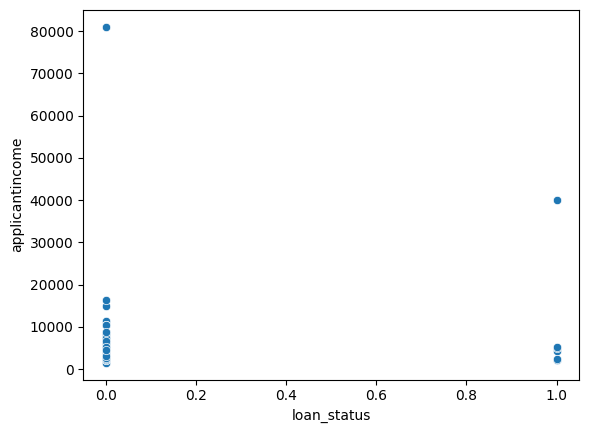

In [27]:
# # test

area_credhistory = loans.copy()
area_credhistory = area_credhistory[(area_credhistory.credit_history == 0)]
# sns.boxenplot(data=area_credhistory, x='credit_history',y='property_area',hue='loan_status')
# loans.pivot_table(values='loan_status', index=['credit_history','property_area'], aggfunc='sum')
sns.scatterplot(data=area_credhistory, x= 'loan_status',y='applicantincome')
# loans[(loans.loanamount == 600)& (loans.credit_history == 0)]

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
155,LP001536,male,yes,4.0,graduate,no,39999,0.0,600.0,180.0,0.0,semiurban,1


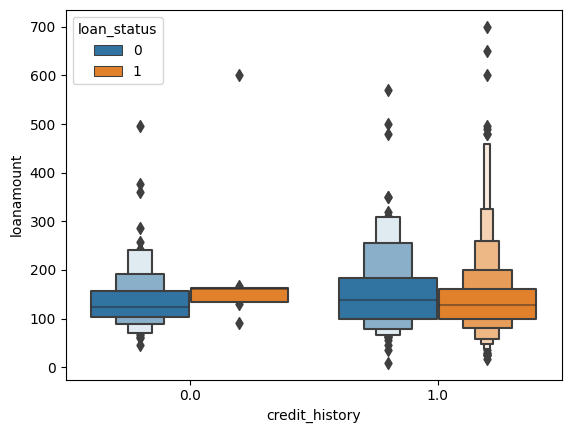

In [28]:
area_credhistory = loans.copy()
area_credhistory = loans_analysis[(loans_analysis.loanamount > 400) & (area_credhistory.credit_history == 0)]
# sns.boxenplot(data=area_credhistory, x='credit_history',y='property_area',hue='loan_status')
# loans.pivot_table(values='loan_status', index=['credit_history','property_area'], aggfunc='sum')
sns.boxenplot(data=loans, x= 'credit_history',y='loanamount',hue='loan_status')
loans[(loans.loanamount == 600)& (loans.credit_history == 0)]

# 1st insight
### - Altough Credit History is the most important feature for loans to be approved , but one oof the applicants income is very high we give approval . we need to investigate futher ... 



C:\Users\Moga\AppData\Local\Temp\ipykernel_12904\1346467030.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amount_income['avg'] = amount_income.loanamount  / amount_income.total * 100


avg income of approval :
 2.346406676366091


<Axes: xlabel='avg', ylabel='Count'>

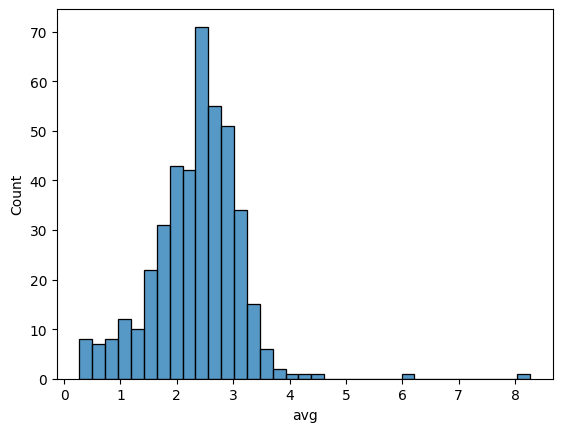

In [29]:
amount_income = loans_analysis[(loans_analysis.loan_status == 1)]
amount_income['avg'] = amount_income.loanamount  / amount_income.total * 100
print(f'avg income of approval :\n {amount_income["avg"].mean()}')
amount_income[['avg','loanamount','applicantincome']].sort_values(by='loanamount', ascending= False).describe()
sns.histplot(amount_income.avg)

# 2nd insight
# - TO get approval,  loan amount on average is 2.34 of Total income (applicant income and Coapplicant income)  . Based on data we have , we don't give income more than 4 % of total income.

In [30]:
property_married = loans_analysis.copy()

loans[(loans_analysis.credit_history == 0)& (loans_analysis.dependents == 4)&(loans.loan_status == 1)]

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
155,LP001536,male,yes,4.0,graduate,no,39999,0.0,600.0,180.0,0.0,semiurban,1
267,LP001882,male,yes,4.0,graduate,no,4333,1811.0,160.0,360.0,0.0,urban,1


# 3rd insight

## we should investigate about these 2 loan IDs if it should be approved or not as :
 - Especially Loan ID (LP001882) the loan amount .
 - Loan ID (LP001882) higher than applicant income plus applicant has bad credit history in addition not educated which all tends to not giving loan.

In [31]:
 credit_col = loans_analysis[(loans_analysis.credit_history == 0)&(loans_analysis.married == 'no')&(loans_analysis.education == 'graduate')& (loans_analysis.loan_status ==1 )] 
# pd.crosstab([credit_col.education,credit_col.married],
#             credit_col.loan_status, aggfunc=['count'], values= 'loan_status').plot(kind='barh')
credit_col

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status,total
122,female,no,0.0,graduate,no,2137,8980.0,137.0,360.0,0.0,semiurban,1,11117.0
201,male,no,2.0,graduate,no,4923,0.0,166.0,360.0,0.0,semiurban,1,4923.0
326,male,no,0.0,graduate,no,4917,0.0,130.0,360.0,0.0,rural,1,4917.0


In [32]:
# 4th insight
# - applicants whose credit history is bad and not graduated also not married thay don't have 

In [33]:
pd.crosstab(loans_analysis.property_area,
            loans_analysis.loan_status, aggfunc=['count'], values= 'loan_status')

count     
loan_status       0    1
property_area           
rural            69  110
semiurban        54  179
urban            69  133

In [34]:
loans_analysis.columns

Index(['gender', 'married', 'dependents', 'education', 'self_employed',
       'applicantincome', 'coapplicantincome', 'loanamount',
       'loan_amount_term', 'credit_history', 'property_area', 'loan_status',
       'total'],
      dtype='object')

In [35]:
for i in loans_analysis.columns:
    print(f'{i}: {loans_analysis[i].mean().round(3)}')
loans_analysis

TypeError: Could not convert malemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalefemalemalemalemalemalemalemalemalemalemalemalemalefemalemalemalemalemalemalemalemalefemalemalemalemalemalemalemalemalefemalemalemalefemalefemalefemalefemalefemalemalefemalemalemalemalemalemalemalemalemalemalefemalemalemalemalemalefemalemalemalemalemalemalemalemalemalemalemalefemalemalefemalemalemalemalemalemalemalemalemalemalemalemalemalemalefemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalefemalemalefemalemalemalefemalemalemalefemalemalefemalefemalemalemalefemalemalemalemalemalemalemalemalemalemalemalefemalemalemalemalemalemalemalemalemalefemalefemalemalefemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalefemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalefemalemalemalemalemalemalemalemalemalemalemalemalemalefemalefemalemalemalemalemalemalemalefemalefemalemalemalemalefemalemalemalemalemalemalemalemalemalefemalemalemalemalemalemalemalemalemalemalemalemalemalemalefemalemalemalemalefemalefemalemalemalemalemalemalemalemalemalemalemalemalemalefemalemalemalemalefemalemalemalemalemalemalemalefemalefemalemalemalemalemalefemalefemalefemalemalemalemalemalemalemalemalemalefemalemalemalemalefemalemalemalefemalemalefemalemalemalemalemalefemalemalemalemalefemalefemalemalemalemalefemalemalemalemalefemalefemalemalemalefemalemalefemalemalemalemalemalemalefemalemalemalemalemalefemalemalemalemalemalefemalefemalemalemalemalemalemalemalemalemalefemalefemalemalefemalemalemalemalemalemalemalemalemalemalemalemalefemalefemalefemalemalemalemalemalefemalemalemalemalemalemalemalemalemalemalefemalemalemalemalefemalemalemalemalemalemalemalemalefemalemalemalemalemalemalemalemalemalemalemalemalemalemalefemalemalemalefemalemalemalemalefemalefemalefemalemalefemalemalemalefemalemalemalemalefemalefemalefemalemalemalemalemalefemalemalemalemalemalefemalemalemalemalefemalemalemalemalemalefemalemalemalemalefemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalefemalemalemalemalemalefemalemalemalemalemalefemalemalemalemalemalemalemalefemalemalemalemalemalemalemalemalemalemalemalemalemalefemalemalefemalemalemalemalemalefemalefemalemalemalemalemalemalemalemalefemalemalemalemalemalemalemalefemalemalemalefemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalefemalemalemalemalemalemalefemalefemalefemalemalefemalemalemalemalefemalemalemalemalemalemalemalemalefemalemalemalefemalemalefemalemalemalemalemalemalemalefemalemalemalemalemalemalemalemalemalemalemalemalemalemalefemalemalemalemalemalefemalemalemalemalemalemalemalemalemalemalemalemalemalefemalemalemalemalefemalemalemalemalemalefemalemalemalemalefemale to numeric

In [ ]:
case1 = loans_analysis[(loans_analysis.total > loans_analysis['total'].mean())& (loans_analysis.loanamount > loans_analysis['loanamount'].mean()) ]
case2 = loans_analysis[(loans_analysis.total < loans_analysis['total'].mean())& (loans_analysis.loanamount > loans_analysis['loanamount'].mean()) ]
case3 = loans_analysis[(loans_analysis.total > loans_analysis['total'].mean())& (loans_analysis.loanamount < loans_analysis['loanamount'].mean()) ]
case4 = loans_analysis[(loans_analysis.total < loans_analysis['total'].mean())& (loans_analysis.loanamount < loans_analysis['loanamount'].mean()) ]
# for i in case1,case2,case3,case4:
#     sns.lmplot(data=i, x='total', y='loanamount',hue='loan_status')
    
#     plt.show()

In [ ]:
# Grouping Categorical Columnns by mean and count per loan status and check the status rate and risk ration for each group.
for col in categorical_cols:
    df_group = case2.groupby(by=col).loan_status.agg(['mean','count'])
    df_group['diff'] = df_group['mean'] - global_mean
    df_group['risk'] = df_group['mean'] / global_mean
    display(df_group)

In [ ]:
# how much we konw abount Loan Status 
# create this function because apply function takes onlyl one argumnet and mutual_info_score takes two arguments. 
def calculate_mi(series):
    return mutual_info_score(series, case1.loan_status)

# appened function we created to apply function >> 
df_mi = case1[categorical_cols].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')


display(df_mi.head(10))

In [ ]:
case1 = loans_analysis[(loans_analysis.total < loans_analysis['total'].mean())&
                       (loans_analysis.loanamount > loans_analysis['loanamount'].mean())&
                       ( laons_analysis.credit_history == 0 )&
                       ( laons_analysis.loan_status ==  1)].head(50)
case1

# -----------------------

In [ ]:
loans['credit_history'] = loans['credit_history'].astype(int)
loans['credit_history'] == 0

In [ ]:
loans[(loans['credit_history']== 0) & (loans['education'=='not_graduate'])]

In [ ]:
loans[(loans.loan_status == 1) & (loans.education == 0) & (loans.credit_history == 0)].head(50)

In [ ]:
loans[(loans.loan_status == 0) & (loans.loanamount < 300) & (loans.credit_history == 0 & (loans.education == 0))].head(50)

In [ ]:
loans[(loans.applicantincome < 100 )&(loans.loan_amount_term < 200 )&(loans.loan_status == 0 ) ].head(50)

In [ ]:
loans[(loans.applicantincome  < 200)& (loans.loanamount > 200)]  
loans[(loans.credit_history  ==  0)& (loans.loan_status == 1)]  

In [ ]:
sns.scatterplot(x='applicantincome', y='loanamount', data=loans , hue = 'loan_amount_term')

In [ ]:
loans.columns

In [ ]:
income_laonamount = loans[['gender', 'married', 'dependents', 'education',
       'self_employed', 'applicantincome', 'coapplicantincome', 'loanamount',
       'loan_amount_term', 'credit_history', 'property_area', 'loan_status']]
income_laonamount['diff'] =income_laonamount.applicantincome - income_laonamount.loanamount
income_laonamount['total'] =income_laonamount.applicantincome + income_laonamount.coapplicantincome
income_laonamount['diff_1'] =income_laonamount.total - income_laonamount.loanamount
income_laonamount['diff'] = income_laonamount['diff'].astype(float)
income_laonamount['diff_1'] = income_laonamount['diff_1'].astype(float)
income_laonamount=income_laonamount[(income_laonamount.diff_1 < 10000) & (income_laonamount.loan_status == 1 )& (income_laonamount.credit_history ==0) ]
# sns.scatterplot(data=income_laonamount,x='diff',y='loanamount',hue='loan_status')
sns.scatterplot(data=income_laonamount,x='diff_1',y='loanamount',hue='loan_status')
income_laonamount
# income_laonamount['diff_1'].median()

In [ ]:
income_laonamount['diff_1'] = income_laonamount['diff_1'].astype(float)
income_laonamount['diff'] = income_laonamount['diff'].astype(float)

income_laonamount[(income_laonamount['diff']  < -300 ) & (income_laonamount.loan_status == 0) ].head(50)

In [ ]:
loans[(loans.loan_status == 1) & (loans.credit_history == 0)]

In [ ]:
pd.crosstab(loans.loan_status,loans.credit_history)

In [ ]:
 loans[(loans.credit_history == 1) & (loans.loan_status == 0)&(loans.dependents == 0.0)&(loans.loan_amount_term == 360) ].sort_values(by='loanamount').head(50)

In [ ]:
hist_status = loans[(loans.credit_history == 1) &(loans.loan_status == 0) ]
pd.crosstab(hist_status.loan_amount_term, hist_status.dependents )

# -------------------

In [ ]:
# COoments here
# Multivariant Exploriation 

# 2.2) Feature importance: Mutual Information 

In [37]:
# import mutual_info_score to check the importance of features for categorical dataset
from sklearn.metrics import mutual_info_score

In [38]:
# how much we konw abount Loan Status 
# create this function because apply function takes onlyl one argumnet and mutual_info_score takes two arguments. 
def calculate_mi(series):
    return mutual_info_score(series, loans.loan_status)

# appened function we created to apply function >> 
df_mi = loans[categorical_cols].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')


display(df_mi.head(10))

,MI
credit_history,0.142400
property_area,0.010203
married,0.004130
education,0.003591
dependents,0.002618
gender,0.000161
self_employed,0.000007


### Here we check how much we know about loan Status by checking the mean of the relation between the categorical features and Loan Status :
-  the higher of mutual_info_score the more likely to take a loan. 
-  so here Credit History is the most important feature to determine if we will give a loan or not.
-  then property area is less important than Credit  History and more important than Married Status and So on.
-  the least important feature of our features is Self Employed and Gender we do not focus more on Gender and if he is self Employed or not.


# 2.3) Feature importance: Correlation 

- #### Correlaion Coefficient 

In [41]:
# Correation Coefficient between Numerical Featues and Loan Status
loans[numerical_cols].corrwith(loans.loan_status).sort_values(ascending=True).to_frame('correlation')


,correlation
coapplicantincome,-0.059187
loanamount,-0.036416
loan_amount_term,-0.020974
applicantincome,-0.004710


In [42]:
loans[numerical_cols].corr()
# statsmodel p-value

,applicantincome,coapplicantincome,loanamount,loan_amount_term
applicantincome,1.000000,-0.116605,0.565620,-0.045242
coapplicantincome,-0.116605,1.000000,0.187828,-0.059675
loanamount,0.565620,0.187828,1.000000,0.038801
loan_amount_term,-0.045242,-0.059675,0.038801,1.000000


## Correlation Coefficient is between -1 to 1 

- #### let's say: 
- #### from 0.0 to 0.2 or 0.0 to -0.2 it's low correlation 
- #### from 0.2 to 0.5 or -0.2 to -0.5 it's moderate correlation 
- #### from 0.6 to 1.0 or -0.6 to -1.0 it's moderate correlation 
## so here negative correlation  :
- #### the lower the correlation the higher percentage to give a loan
- #### so here Credit History is the most important feature then laon amount and BTW it's all low correlation.
 

In [43]:
loans.groupby(by='loan_status')[numerical].mean()


,applicantincome,coapplicantincome,loanamount,loan_amount_term
loan_status,,,,
0,5446.078125,1877.807292,150.945488,344.000000
1,5384.068720,1504.516398,144.349606,341.090047


# 3) Label encoding

 - #### encode categorical features

In [44]:
from sklearn.preprocessing import LabelEncoder
#Initialize the label encoder
label_encoder = LabelEncoder()
# Apply label encoding to categorical columns
loans['gender'] = label_encoder.fit_transform(loans['gender'])
loans['self_employed'] = label_encoder.fit_transform(loans['self_employed'])
loans['applicantincome'] = label_encoder.fit_transform(loans['applicantincome'])
loans['property_area'] = label_encoder.fit_transform(loans['property_area'])
loans['education'] = label_encoder.fit_transform(loans['education'])
loans['married'] = label_encoder.fit_transform(loans['married'])


In [45]:
X_values = loans[categorical_cols+numerical_cols]

#  feature Scaling

In [46]:
# determine X , y 
x = X_values
y = loans.loan_status

In [47]:
x

,credit_history,property_area,married,education,dependents,gender,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term
0,1.0,2,0,0,0.0,1,0,376,0.0,146.412162,360.0
1,1.0,0,1,0,1.0,1,0,306,1508.0,128.000000,360.0
2,1.0,2,1,0,0.0,1,1,139,0.0,66.000000,360.0
3,1.0,2,1,1,0.0,1,0,90,2358.0,120.000000,360.0
4,1.0,2,0,0,0.0,1,0,381,0.0,141.000000,360.0
...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,0,0,0,0.0,0,0,125,0.0,71.000000,360.0
610,1.0,0,1,0,4.0,1,0,275,0.0,40.000000,180.0
611,1.0,2,1,0,1.0,1,0,431,240.0,253.000000,360.0
612,1.0,2,1,0,2.0,1,0,422,0.0,187.000000,360.0


In [48]:
Scaled_cols = ['applicantincome','coapplicantincome','loanamount','loan_amount_term']
# perform MinMaxScaler on the selected collumns
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
x[Scaled_cols]=st.fit_transform(x[Scaled_cols])

# print the normalized dataset 
print('Normalized Dataset: ')
print(x.head())


Normalized Dataset: 
   credit_history  property_area  married  education  dependents  gender  \
0             1.0              2        0          0         0.0       1   
1             1.0              0        1          0         1.0       1   
2             1.0              2        1          0         0.0       1   
3             1.0              2        1          1         0.0       1   
4             1.0              2        0          0         0.0       1   

   self_employed  applicantincome  coapplicantincome  loanamount  \
0              0         0.898633          -0.554487    0.000000   
1              0         0.410559          -0.038732   -0.219273   
2              1        -0.753846          -0.554487   -0.957641   
3              0        -1.095498           0.251980   -0.314547   
4              0         0.933495          -0.554487   -0.064454   

   loan_amount_term  
0          0.279851  
1          0.279851  
2          0.279851  
3          0.279851  
4  

C:\Users\Moga\AppData\Local\Temp\ipykernel_9020\2160872824.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[Scaled_cols]=st.fit_transform(x[Scaled_cols])


# 4) Splitting The Dataset Into The Training Set And Test Set & Applying K-Fold Cross Validation

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np

In [50]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

# 5) LogisticRegression

In [51]:
#Calculating Confusion Matrix
CM = confusion_matrix(y_test, y_predict)
print('Confusion Matrix is : \n', CM)

# drawing confusion matrix
sns.heatmap(CM, center = True,cmap='coolwarm')
plt.show()

NameError: name 'y_predict' is not defined

In [ ]:
LR = LogisticRegression(solver='liblinear', random_state=1,class_weight='balanced' )
LR.fit(X_train, y_train)

y_predict = LR.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
LR_SC = accuracy_score(y_predict,y_test)
print('accuracy is',accuracy_score(y_predict,y_test))

In [ ]:
#Calculating Confusion Matrix
CM = confusion_matrix(y_test, y_predict)
print('Confusion Matrix is : \n', CM)

# drawing confusion matrix
sns.heatmap(CM, center = True,cmap='coolwarm')
plt.show()

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Create an instance of the RandomOverSampler
oversampler = RandomOverSampler(random_state=1)

# Apply oversampling to the training data
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Create an instance of LogisticRegression
LR = LogisticRegression(solver='liblinear', random_state=1,class_weight='balanced')

# Fit the logistic regression model on the resampled data
LR.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_predict = LR.predict(X_test)

# Print classification report
print(classification_report(y_test, y_predict))

# Calculate and print accuracy score
accuracy = accuracy_score(y_test, y_predict)
print('Accuracy:', accuracy)

In [ ]:
#Calculating Confusion Matrix
CM = confusion_matrix(y_test, y_predict)
print('Confusion Matrix is : \n', CM)

# drawing confusion matrix
sns.heatmap(CM, center = True,cmap='coolwarm')
plt.show()

In [ ]:
Logistic_Regression=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Logistic_Regression.head(5)

# Adjusted Logistic Regression

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Create a Logistic Regression classifier
LRclassifier = LogisticRegression()

# Define the parameter grid to search
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=LRclassifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create a new Logistic Regression classifier with the best parameters
LRclassifier_best = LogisticRegression(**best_params, class_weight='balanced')

# Fit the classifier to the training data
LRclassifier_best.fit(X_train, y_train)

# Make predictions on the test data
y_pred = LRclassifier_best.predict(X_test)

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
accuracy

# SVC

In [ ]:
#Support Vector Classifier 
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

SVCclassifier = SVC(kernel='rbf', max_iter=1000,class_weight='balanced')
SVCclassifier.fit(X_train, y_train)


y_pred = SVCclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)

In [ ]:
from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)

In [ ]:
SVCAcc

# RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Create a Random Forest classifier
RFclassifier = RandomForestClassifier(n_estimators=100)

# Fit the classifier to the training data
RFclassifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = RFclassifier.predict(X_test)

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Calculate accuracy
RFacc = accuracy_score(y_pred, y_test)

In [ ]:
RFacc

In [ ]:
#Calculating Confusion Matrix
CM = confusion_matrix(y_test, y_predict)
print('Confusion Matrix is : \n', CM)

# drawing confusion matrix
sns.heatmap(CM, center = True,cmap='coolwarm')
plt.show()

# XGboost

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Create an XGBoost classifier
XGBclassifier = XGBClassifier()

# Fit the classifier to the training data
XGBclassifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = XGBclassifier.predict(X_test)

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Calculate accuracy
XGBacc = accuracy_score(y_pred, y_test)

In [ ]:
XGBacc

In [ ]:
#Calculating Confusion Matrix
CM = confusion_matrix(y_test, y_predict)
print('Confusion Matrix is : \n', CM)

# drawing confusion matrix
sns.heatmap(CM, center = True,cmap='coolwarm')
plt.show()

# Adjusted xgboost

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


XGBclassifier = XGBClassifier()

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [3, 4, 5],  # Maximum depth of each tree
    'learning_rate': [0.1, 0.01, 0.001]  # Learning rate
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=XGBclassifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create a new XGBoost classifier with the best parameters
XGBclassifier_best = XGBClassifier(**best_params)

# Fit the classifier to the training data
XGBclassifier_best.fit(X_train, y_train)

# Make predictions on the test data
y_pred = XGBclassifier_best.predict(X_test)

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy 

In [ ]:
accuracy

# Clustering

In [52]:
# import KMeans
from sklearn.cluster import KMeans

In [59]:
loans['totalincome'] = loans.applicantincome + loans.coapplicantincome
# Select the features for clustering
features = [ 'married', 'education','loanamount', 'loan_amount_term',
            'credit_history', 'loan_status','totalincome']

In [60]:
# Extract the selected features from the DataFrame
X_cluster = loans[features]

C:\Users\Moga\anaconda3\envs\loan\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Moga\anaconda3\envs\loan\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Moga\anaconda3\envs\loan\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Moga\anaconda3\envs\loan\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Moga\anacon

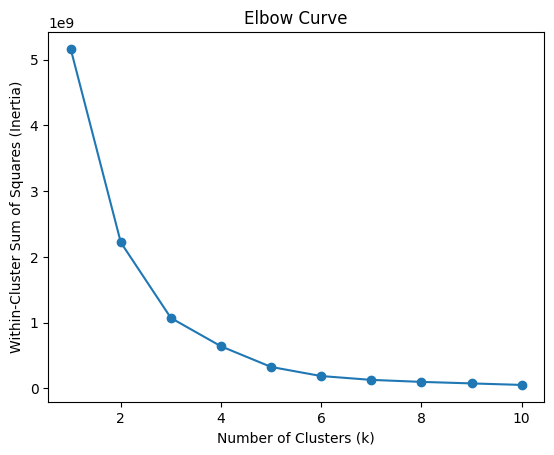

In [61]:
# Use the Elbow method to find the optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_cluster)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
import matplotlib.pyplot as plt
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.title('Elbow Curve')
plt.show()

In [62]:
# Create a K-means clustering object
kmeans = KMeans(n_clusters=4, random_state=42)

# Fit the K-means model to the data
kmeans.fit(X_cluster)

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

C:\Users\Moga\anaconda3\envs\loan\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


          married  education  loanamount  loan_amount_term  credit_history  \
Cluster                                                                      
0        0.526316   0.203947  141.326836           339.000        0.858553   
1        0.750000   0.071429  219.589286           331.500        0.839286   
2        0.250000   0.000000  195.500000           315.000        1.000000   
3        0.792000   0.272000  135.418838           348.432        0.852000   

         loan_status   totalincome  
Cluster                             
0           0.671053    377.091842  
1           0.678571   5786.517857  
2           0.250000  28906.250000  
3           0.716000   2371.476000  


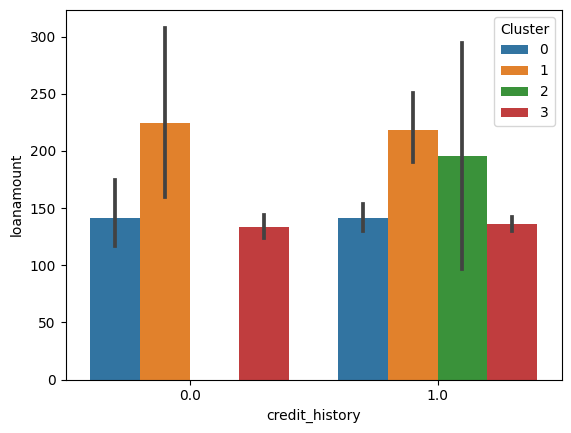

In [77]:
# Assign cluster labels to the original dataset
loans['Cluster'] = cluster_labels

# Perform further analysis or visualization based on the clusters
# Example: Calculate cluster statistics
cluster_stats = loans.groupby('Cluster')[features].mean()
print(cluster_stats)

# Example: Visualize the clusters
sns.barplot(y=loans['loanamount'], x=(loans['credit_history']  ),data=loans, hue=loans['Cluster'])
# plt.xlabel('loanamount')
# plt.ylabel('loan_sta')
# plt.title('Clustering Results')
plt.show()